In [1]:
import gymnasium as gym
import foraging_envs
from torch import nn
from convert_net import *


from stable_baselines3.common.env_checker import check_env

env = gym.make("foraging_envs/foraging-two", episode_length = 100, flower_distribution = "uniform", decay_parameter = .25, travel_time = 2, render_mode = "human")
check_env(env)

In [3]:
from stable_baselines3 import DQN
net_arch = [64, 64]
activation_fn = nn.ReLU
policy_kwargs = dict(net_arch = net_arch, activation_fn = activation_fn)

# learning stuff
model = DQN("MlpPolicy", env, verbose=1, policy_kwargs = policy_kwargs)
model.learn(total_timesteps=2000, progress_bar=True, log_interval=4)


net1 = model.get_parameters()  # This will print the parameters of the model
# find parameters to put into our copy network
state, info = env.reset()
n_observations = len(state)

network_copy_args = dict(obs_space = n_observations, action_space =env.action_space.n, net_arch = net_arch, activation_fn = activation_fn)

network_copy = CustomNetwork(network_copy_args)
network_copy = CustomNetwork.copy_weights(net1=model, net2 = network_copy)




vec_env = model.get_env()
# Save the model
model.save("Saved Models/dqn_foraging")

c:\Users\nicla\OneDrive\Documents\Reinforcement Learning\.venv\Lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -36.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1418     |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.129    |
|    n_updates        | 74       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -12.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1310     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |        

AttributeError: 'CustomNetwork' object has no attribute 'get_parameters'

In [20]:
# del  model, vec_env
model = DQN.load("Saved Models/dqn_foraging")

vec_env = model.get_env()


obs = vec_env.reset()

for i in range(20000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    # vec_env.render("human")
    # VecEnv resets automatically
    # if done:
    #   obs = vec_env.reset()

AttributeError: 'NoneType' object has no attribute 'reset'

In [13]:
model = DQN.load("Saved Models/dqn_foraging", env=vec_env)

'''
obs, info = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()
        '''

'\nobs, info = env.reset()\nwhile True:\n    action, _states = model.predict(obs, deterministic=True)\n    obs, reward, terminated, truncated, info = env.step(action)\n    if terminated or truncated:\n        obs, info = env.reset()\n        '

In [14]:
#vec_env.get_attr("reward_hist_all_ep")
vec_env.get_attr("reward_hist_all_ep")[0][40]  # Get the first 10 rewards from the first episode

print(len(vec_env.get_attr("reward_hist_all_ep")[0][25]))  # Length of the first episode's reward history

AttributeError: 'NoneType' object has no attribute 'get_attr'

In [1]:

# plot the list of lengths 
import matplotlib.pyplot as plt
plt.plot([len(x) for x in vec_env.get_attr("reward_hist_all_ep")[0][:40]])
plt.xlabel("Episode")
plt.ylabel("Length of Episode")
plt.title("Episode Lengths Over Time")

NameError: name 'vec_env' is not defined

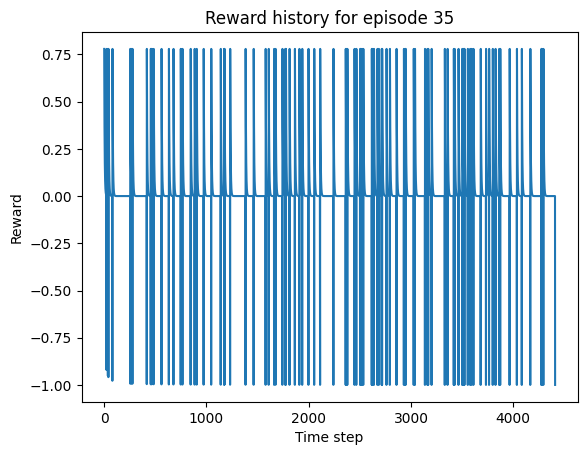

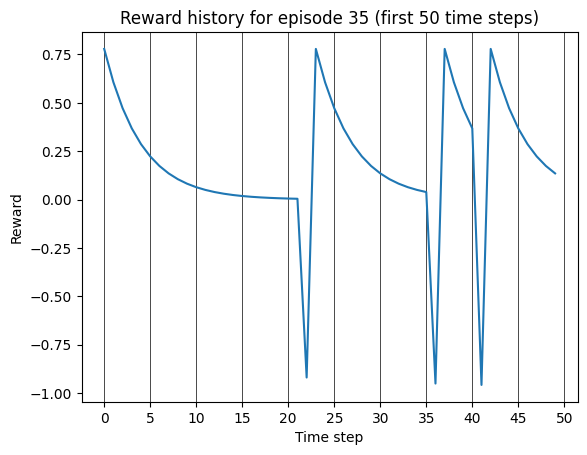

In [61]:
# plot the reward history from the first episode 
import matplotlib.pyplot as plt
import numpy as np

num_show = 50
which_episode = 35  # Change this to plot a different episode

reward_hist = vec_env.get_attr("reward_hist_all_ep")[0][which_episode]
reward_hist = np.array(reward_hist)
plt.plot(reward_hist)
plt.title(f"Reward history for episode {which_episode}")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.show()

# now plot the reward history from the first episode, only the first 100 time steps
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(reward_hist[:num_show])
plt.title(f"Reward history for episode {which_episode} (first {num_show} time steps)")
plt.xlabel("Time step")
plt.ylabel("Reward")
# add graph paper like lines to the grid
major_ticks = np.arange(0, num_show+1, 5)

ax.set_xticks(major_ticks) 
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', axis='x')
plt.show()



Notes: 

Should prbably keep track of "c" history- it seems to always be .2 ish

As the episode goes on, it exploits more an more- see if this changes with longer travel time? If the c function is broken, changing this shouldnt do anything 

c is only used right after the agent chooses to leave 

Updates: 

The exponential decay is correct- we were reading it wrong 

I think the use of sight lines if the next step to including a travel time (tube idea) 

